### Extraer palabras del texto

In [1]:
# palabras = sorted(list(words_set))

# with open('out/palabras_el_quijote.txt', 'a') as f:
#     for palabra in palabras:
#         f.write(f'{palabra}\n')

### Generación de DataFrames

In [2]:
from collections import Counter

import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [3]:
list_of_words = []

with open('in/el_quijote.txt') as file:
    for line in file.readlines():
        line = re.sub(r'[^\w\s]|[\d]', '', line.lower())  # Elimina signos de puntuación.
        list_of_words += line.split()

words_set = set(list_of_words)

In [4]:
df = pd.DataFrame([{'word': k, 'lenght': len(k), 'count': v} for k, v in Counter(list_of_words).items()])

In [5]:
with open('out/morfologia.json') as json_file:
    # Convertir el diccionario a un DataFrame.
    dict_df = pd.DataFrame(json.load(json_file))

# Combinar los DataFrames utilizando merge().
df = pd.merge(df, dict_df, left_on='word', right_on='palabra', how='left')

# Eliminar la columna 'palabra' del DataFrame resultante.
df.drop('palabra', axis=1, inplace=True)

df[df['word'].str.startswith('a')]

,word,lenght,count,tipo,genero
25,acordarme,9,3,verbo,neutro
32,astillero,9,2,sustantivo,masculino
33,adarga,6,19,sustantivo,femenino
34,antigua,7,17,adjetivo,femenino
41,algo,4,127,pronombre,neutro
...,...,...,...,...,...
22582,ahijársele,10,1,verbo,neutro
22586,alambre,7,1,sustantivo,masculino
22595,atrever,7,1,verbo,neutro
22598,advertirás,10,1,verbo,neutro


### Generación de gráficos

Text(0.5, 1.0, 'Palabras por longitud')

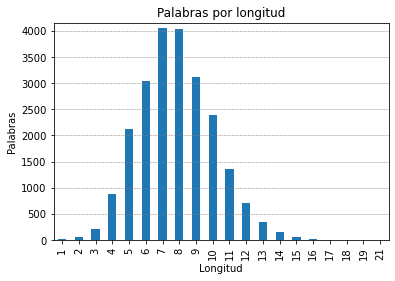

In [6]:
grouped = df.groupby('lenght').size()

ax = grouped.plot(kind='bar')

for y in ax.get_yticks():
    ax.axhline(y, color='gray', linestyle='--', linewidth=0.5)

ax.set_ylim(top=grouped.max()+100)
    
plt.xlabel('Longitud')
plt.ylabel('Palabras')
plt.title('Palabras por longitud')

Text(0.5, 1.0, 'Top 15 palabras más comunes')

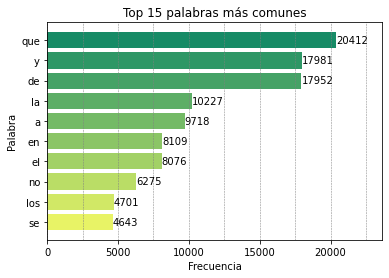

In [7]:
top_15 = df.nlargest(10, 'count')

palette = sns.color_palette('summer', len(top_15))

fig, ax = plt.subplots()

bars = ax.barh(top_15['word'], top_15['count'], color=palette)

ax.invert_yaxis()

for x in ax.get_xticks():
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5)

for bar in bars:
    width = bar.get_width()
    height = bar.get_height()
    ax.text(width, bar.get_y() + height/2, f'{width}', ha='left', va='center')

plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Top 15 palabras más comunes')

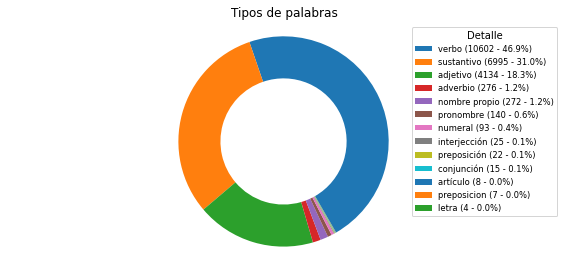

In [8]:
df_tipo = df.dropna(subset=['tipo'])
count_tipo = df_tipo['tipo'].value_counts()

labels = count_tipo.index
sizes = count_tipo.values

fig, ax = plt.subplots(figsize=(8, 3.8))
_, _, autotexts = ax.pie(sizes, labels=None, autopct='%1.1f%%', startangle=300, wedgeprops=dict(width=0.2), textprops={'fontsize': 10}, radius=0.5)
ax.axis('equal')
plt.title('Tipos de palabras')

legend_labels = [f'{label} ({size} - {percent:.1f}%)' for label, size, percent in zip(labels, sizes, sizes/sum(sizes)*100)]
plt.legend(legend_labels, loc='upper right', title='Detalle', fontsize='small')

for autotext in autotexts:
    autotext.set_visible(False)  # Oculta los valores de "word" en los segmentos del anillo.

plt.tight_layout()

Text(0.5, 1.0, 'Distribución por género')

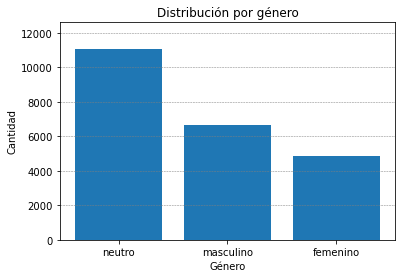

In [9]:
df_genero = df.dropna(subset=['genero'])
grouped = df_genero['genero'].value_counts().sort_values(ascending=False)

plt.bar(grouped.index, grouped.values)

ax = plt.gca()
yticks = ax.get_yticks()
for ytick in yticks:
    plt.axhline(y=ytick, color='gray', linestyle='--', linewidth=0.5)

plt.xticks()
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribución por género')

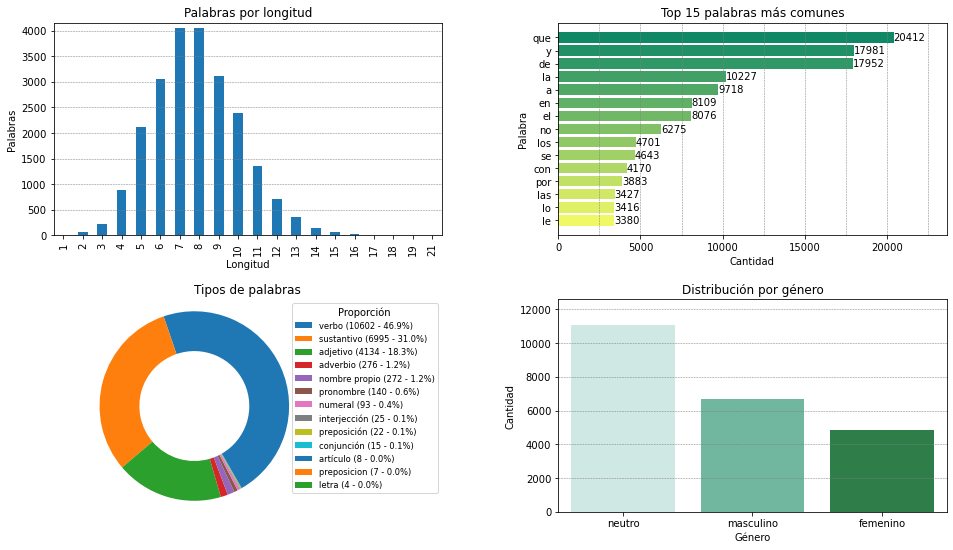

In [10]:
# Crear la figura y la matriz de subgráficos.
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

# Gráfico 1 - Palabras por longitud.
grouped = df.groupby('lenght').size()
ax1 = axes[0, 0]
grouped.plot(kind='bar', ax=ax1)

for y in ax1.get_yticks():
    ax1.axhline(y, color='gray', linestyle='--', linewidth=0.5)

ax1.set_ylim(top=grouped.max()+100)
ax1.set_xlabel('Longitud')
ax1.set_ylabel('Palabras')
ax1.set_title('Palabras por longitud')

# Gráfico 2 - Top 15 palabras.
top_15 = df.nlargest(15, 'count')
palette = sns.color_palette('summer', len(top_15))
ax2 = axes[0, 1]
bars = ax2.barh(top_15['word'], top_15['count'], color=palette)

ax2.invert_yaxis()

for x in ax2.get_xticks():
    ax2.axvline(x, color='gray', linestyle='--', linewidth=0.5)

for bar in bars:
    width = bar.get_width()
    height = bar.get_height()
    ax2.text(width, bar.get_y() + height/2, f'{width}', ha='left', va='center')

ax2.set_xlabel('Cantidad')
ax2.set_ylabel('Palabra')
ax2.set_title('Top 15 palabras más comunes')

# Gráfico 3 - Tipos de palabras.
df_tipo = df.dropna(subset=['tipo'])
count_tipo = df_tipo['tipo'].value_counts()

labels = count_tipo.index
sizes = count_tipo.values

ax3 = axes[1, 0]
_, _, autotexts = ax3.pie(
    sizes, labels=None, autopct='%1.1f%%', startangle=300,
    wedgeprops=dict(width=0.21), textprops={'fontsize': 10}, radius=0.5
)
ax3.axis('equal')
ax3.set_title('Tipos de palabras')

legend_labels = [f'{label} ({size} - {percent:.1f}%)' for label, size, percent in zip(labels, sizes, sizes/sum(sizes)*100)]
ax3.legend(legend_labels, loc='upper right', title='Proporción', fontsize='small')

for autotext in autotexts:
    autotext.set_visible(False)  # Oculta los valores de "word" en los segmentos del anillo.

# Ajustar los límites del eje X para dejar espacio a la izquierda.
ax3.set_xlim(left=-0.001)

# Gráfico 4 - Distribución por género.
df_genero = df.dropna(subset=['genero'])
grouped = df_genero['genero'].value_counts().sort_values(ascending=False)

ax4 = axes[1, 1]

sns.barplot(x=grouped.index, y=grouped.values, palette='BuGn', ax=ax4)

ax = plt.gca()
yticks = ax.get_yticks()
for ytick in yticks:
    ax4.axhline(y=ytick, color='gray', linestyle='--', linewidth=0.5)
    
ax4.set_xlabel('Género')
ax4.set_ylabel('Cantidad')
ax4.set_title('Distribución por género')

# Ajustar el espaciado entre subgráficos.
plt.subplots_adjust(wspace=0.3, hspace=0.3)

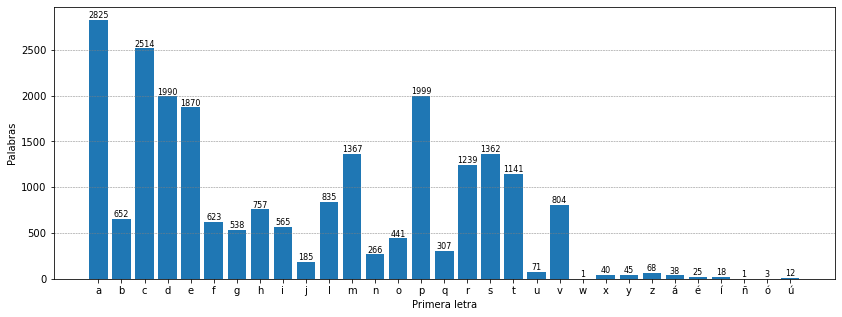

In [11]:
df['primera letra'] = df['word'].str[0]
letter_counts = df.groupby('primera letra').size()

plt.figure(figsize=(14, 5))
plt.bar(letter_counts.index, letter_counts.values)
plt.xlabel('Primera letra')
plt.ylabel('Palabras')

plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# Agregar los valores en la parte superior de las barras.
for i, value in enumerate(letter_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom', size=8)

### Frecuencia por primera letra en tipos de palabras

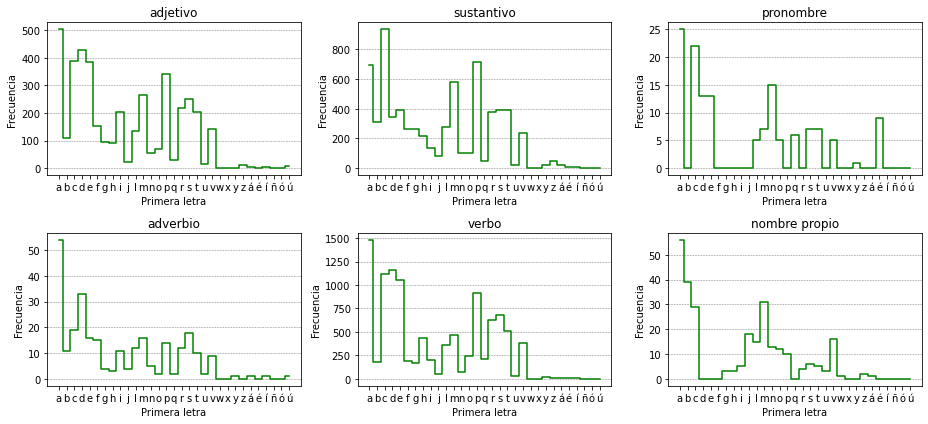

In [12]:
# Tipos de palabras que queremos filtrar.
tipos_filtrados = ['verbo', 'sustantivo', 'adjetivo', 'adverbio', 'nombre propio', 'pronombre']

# Filtrar el DataFrame original por los tipos de palabras seleccionados.
df_filtrado = df[df['tipo'].isin(tipos_filtrados)]

# Obtener los tipos de palabras únicos del DataFrame filtrado.
tipos_palabras = df_filtrado['tipo'].unique()

# Crear una malla de subgráficos de 2x3
fig, axs = plt.subplots(2, 3, figsize=(13, 6))

# Iterar sobre los tipos de palabras y crear un gráfico para cada uno.
for i, tipo in enumerate(tipos_palabras):
    # Filtrar el DataFrame filtrado por el tipo de palabra actual.
    df_tipo = df_filtrado[df_filtrado['tipo'] == tipo]
    
    # Calcular el recuento de sustantivos por cada primera letra.
    recuento_letras = df_tipo['primera letra'].value_counts()
    
    # Ordenar las letras en orden alfabético.
    recuento_letras = recuento_letras.sort_index()
    
    # Obtener todas las letras únicas
    todas_letras = sorted(df['primera letra'].unique())
    
    # Crear una nueva Serie con todas las letras y establecer los valores en 0.
    recuento_letras_completo = pd.Series(0, index=todas_letras)
    
    # Combinar los recuentos de las letras existentes con el conjunto completo.
    recuento_letras_completo.update(recuento_letras)
    
    # Obtener los índices de fila y columna en la malla de subgráficos.
    row = i // 3
    col = i % 3
    
    # Seleccionar el subgráfico correspondiente en la malla.
    ax = axs[row, col]
    
    # Dibujar líneas grises horizontales en cada ytick.
    ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Crear el gráfico de líneas en el subgráfico actual.
    ax.plot(recuento_letras_completo.index, recuento_letras_completo.values, drawstyle='steps-mid', color='green')
    
    # Configurar las etiquetas de los ejes y el título.
    ax.set_xlabel('Primera letra')
    ax.set_ylabel('Frecuencia')
    ax.set_title(tipo)

# Ajustar el espaciado entre los subplots y mostrar el gráfico.
plt.tight_layout()

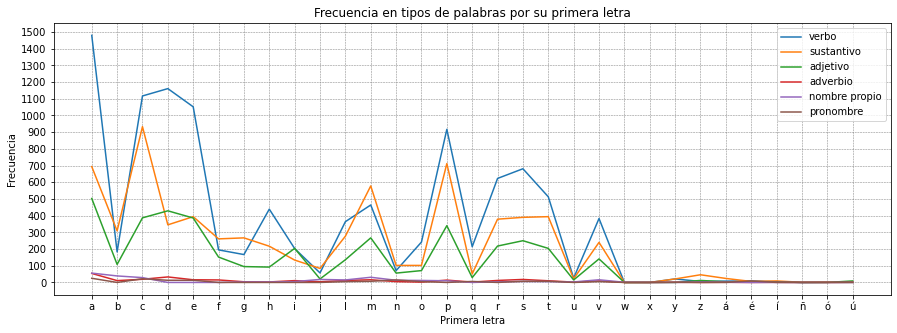

In [13]:
# Crear una figura y un eje para el gráfico.
fig, ax = plt.subplots(figsize=(15, 5))

# Iterar sobre los tipos de palabras y crear una línea para cada uno.
for i, tipo in enumerate(tipos_filtrados):
    # Filtrar el DataFrame filtrado por el tipo de palabra actual.
    df_tipo = df_filtrado[df_filtrado['tipo'] == tipo]
    
    recuento_letras = df_tipo['primera letra'].value_counts()
    
    # Ordenar las letras en orden alfabético.
    recuento_letras = recuento_letras.sort_index()
    
    # Obtener todas las letras sin repetir.
    todas_letras = sorted(df['primera letra'].unique())
    
    # Crear una nueva Serie con todas las letras y establecer los valores en 0.
    recuento_letras_completo = pd.Series(0, index=todas_letras)
    
    # Combinar los recuentos de las letras existentes con el conjunto completo.
    recuento_letras_completo.update(recuento_letras)
    
    # Crear el gráfico de líneas con líneas curvas y color asignado.
    ax.plot(recuento_letras_completo.index, recuento_letras_completo.values, label=tipo)

# Dibujar líneas grises horizontales en cada ytick.
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

# Dibujar líneas grises verticales en cada xtick.
ax.xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

# Establecer la frecuencia de los yticks.
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))

# Configurar las etiquetas de los ejes y el título.
ax.set_xlabel('Primera letra')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia en tipos de palabras por su primera letra')

# Mostrar la leyenda con los tipos de palabras.
ax.legend();

### Frecuencia de palabras adyacentes 2-gram  

In [14]:
import nltk
# nltk.download('punkt')
from nltk import ngrams
from collections import defaultdict

In [15]:
# Creación de los bigramas en base al texto sin signos de puntuación ni espacios.
bigrams = list(ngrams(list_of_words, 2))

In [16]:
# Diccionario para almacenar las estadísticas de palabras siguientes.
siguientes_palabras = defaultdict(list)

# Obtener las palabras siguientes para cada bigrama con "que" como primer elemento.
for bigram in bigrams:
    if bigram[0].lower() in [w for w in top_15['word']]:
        siguientes_palabras[bigram[0]].append(bigram[1])

# Convertir el defaultdict en un diccionario estándar.
siguientes_palabras = dict(siguientes_palabras)

In [17]:
data_set = []

for word, next_words in Counter(siguientes_palabras).items():
    for next_word, count in Counter(next_words).items():
        data_set.append({'word': word, 'next_word': next_word, 'lenght': len(next_word), 'count': count})
        
df_2_gram = pd.DataFrame(data_set)

In [18]:
df_grouped = df_2_gram.groupby('word')
dataframes = []

# Iterar sobre los grupos y crear DataFrames separados.
for group_name, group_df in df_grouped:
    
    # Ordenar los valores de la columna "count" en orden descendente.
    group_df_sorted = group_df.sort_values(by='count', ascending=False)
    
    # Quedarse solo con los 10 primeros valores.
    group_df_top10 = group_df_sorted.head(10)
    
    dataframes.append(group_df_top10)

### Top 10 de palabras siguientes por cada palabra más repetida en el texto

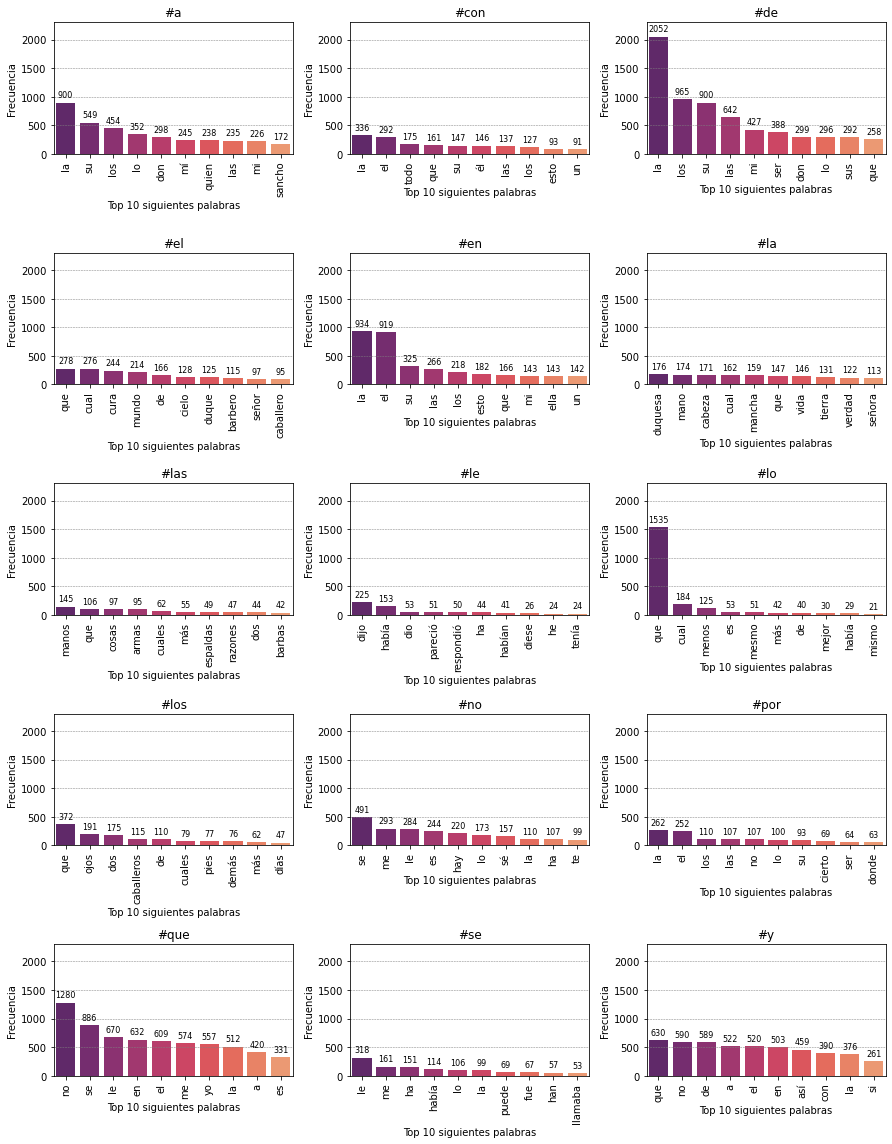

In [19]:
# Cuadrícula de subplots de 5x3.
fig, axs = plt.subplots(5, 3, figsize=(12.5, 16))

# Paleta de colores.
colors = sns.color_palette('flare', 10)[::-1]

# Coordenadas personalizadas para los subplots.
coord = [(0, 0), (0, 1), (0, 2),
         (1, 0), (1, 1), (1, 2),
         (2, 0), (2, 1), (2, 2),
         (3, 0), (3, 1), (3, 2),
         (4, 0), (4, 1), (4, 2)]

# Iterar sobre los DataFrames y dibujar los gráficos de barras en los subplots.
for i, df in enumerate(dataframes):
    # Obtener las coordenadas correspondientes al DataFrame actual.
    row, col = coord[i]
    
    # Seleccionar el subplot correspondiente.
    ax = axs[row, col]
    
    # Ordenar los valores de la columna "count" en orden descendente.
    df_sorted = df.sort_values(by='count', ascending=False)
    
    # Quedarse solo con los 10 primeros valores.
    df_top10 = df_sorted.head(10)
    
    # Inclinar los xticks en 90 grados.
    xticks = range(len(df_top10['next_word']))
    ax.set_xticks(xticks)
    ax.set_xticklabels(df_top10['next_word'], rotation=90)
    
    # Establecer el límite del eje "y".
    max_count = df['count'].max()
    ax.set_ylim(0, df_2_gram['count'].max() + 250)
    
    # Dibujar líneas grises horizontales en cada ytick.
    ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Configurar el gráfico de barras en el subplot.
    sns.barplot(x='next_word', y='count', data=df_top10, ax=ax, palette=colors, saturation=1)

    # Agregar los valores en la cima de cada barra.
    for x, y in zip(range(len(df['next_word'])), df['count']):
        ax.annotate(
            str(y), xy=(x, y), xytext=(0, 3), textcoords='offset points',
            ha='center', va='bottom', size=8
        )
    
    # Establecer etiquetas en los ejes "x" e "y".
    ax.set_xlabel('Top 10 siguientes palabras', fontsize=10)
    ax.set_ylabel('Frecuencia', fontsize=10)
    
    # Título de cada gráfico.
    ax.set_title(f"#{df['word'].iloc[0]}")

# Ajustar el espaciado entre los subplots y mostrar el gráfico.
plt.tight_layout()

In [20]:
bigrams

[('primera', 'parte'),
 ('parte', 'del'),
 ('del', 'ingenioso'),
 ('ingenioso', 'hidalgo'),
 ('hidalgo', 'don'),
 ('don', 'quijote'),
 ('quijote', 'de'),
 ('de', 'la'),
 ('la', 'mancha'),
 ('mancha', 'capítulo'),
 ('capítulo', 'primero'),
 ('primero', 'que'),
 ('que', 'trata'),
 ('trata', 'de'),
 ('de', 'la'),
 ('la', 'condición'),
 ('condición', 'y'),
 ('y', 'ejercicio'),
 ('ejercicio', 'del'),
 ('del', 'famoso'),
 ('famoso', 'hidalgo'),
 ('hidalgo', 'don'),
 ('don', 'quijote'),
 ('quijote', 'de'),
 ('de', 'la'),
 ('la', 'mancha'),
 ('mancha', 'en'),
 ('en', 'un'),
 ('un', 'lugar'),
 ('lugar', 'de'),
 ('de', 'la'),
 ('la', 'mancha'),
 ('mancha', 'de'),
 ('de', 'cuyo'),
 ('cuyo', 'nombre'),
 ('nombre', 'no'),
 ('no', 'quiero'),
 ('quiero', 'acordarme'),
 ('acordarme', 'no'),
 ('no', 'ha'),
 ('ha', 'mucho'),
 ('mucho', 'tiempo'),
 ('tiempo', 'que'),
 ('que', 'vivía'),
 ('vivía', 'un'),
 ('un', 'hidalgo'),
 ('hidalgo', 'de'),
 ('de', 'los'),
 ('los', 'de'),
 ('de', 'lanza'),
 ('lanza', '

In [21]:
# Obtener la frecuencia de cada bigrama.
frequency = {}
for bigram in bigrams:
    first_word, second_word = bigram
    if first_word in frequency:
        frequency[first_word][second_word] = frequency[first_word].get(second_word, 0) + 1
    else:
        frequency[first_word] = {second_word: 1}

# Crear el DataFrame.
data = []
for first_word in frequency:
    for second_word in frequency[first_word]:
        freq = frequency[first_word][second_word]
        data.append([first_word, second_word, freq])

df_probabilidad = pd.DataFrame(data, columns=['Primera palabra', 'Segunda palabra', 'Frecuencia'])
df_probabilidad

,Primera palabra,Segunda palabra,Frecuencia
0,primera,parte,13
1,primera,salida,1
2,primera,salidad,1
3,primera,aventura,4
4,primera,afrenta,1
...,...,...,...
152386,resfriado,ingenio,1
152387,advertirás,si,1
152388,fuesa,donde,1
152389,aconsejando,bien,1


In [22]:
bigrams.count(('de', 'cuyo'))

13

In [23]:
df_probabilidad['Probabilidad'] = df_probabilidad['Frecuencia']/df_probabilidad.groupby('Primera palabra')['Frecuencia'].transform('sum')*100

In [24]:
df_probabilidad

,Primera palabra,Segunda palabra,Frecuencia,Probabilidad
0,primera,parte,13,14.130435
1,primera,salida,1,1.086957
2,primera,salidad,1,1.086957
3,primera,aventura,4,4.347826
4,primera,afrenta,1,1.086957
...,...,...,...,...
152386,resfriado,ingenio,1,100.000000
152387,advertirás,si,1,100.000000
152388,fuesa,donde,1,100.000000
152389,aconsejando,bien,1,100.000000


In [25]:
import heapq

def build_huffman_tree(df):
    frequencies = df.set_index(['Primera palabra', 'Segunda palabra'])['Probabilidad'].to_dict()
    heap = [[weight, [symbol, '']] for symbol, weight in frequencies.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return heap[0]

df_word_primera = df_probabilidad[df_probabilidad['Primera palabra'] == 'primera']

huffman_tree = build_huffman_tree(df_word_primera)
print(huffman_tree)

[100.0, [('primera', 'nos'), '000000'], [('primera', 'opinión'), '000001'], [('primera', 'persona'), '000010'], [('primera', 'por'), '000011'], [('primera', 'pregunta'), '000100'], [('primera', 'salida'), '000101'], [('primera', 'salidad'), '000110'], [('primera', 'satisfación'), '000111'], [('primera', 'que'), '001'], [('primera', 'y'), '010'], [('primera', 'vez'), '0110'], [('primera', 'se'), '011100'], [('primera', 'tierra'), '011101'], [('primera', 'veían'), '011110'], [('primera', 'a'), '0111110'], [('primera', 'afrenta'), '0111111'], [('primera', 'parte'), '100'], [('primera', 'ocasión'), '1010'], [('primera', 'anda'), '1011000'], [('primera', 'belleza'), '1011001'], [('primera', 'cena'), '1011010'], [('primera', 'clavásedes'), '1011011'], [('primera', 'aventura'), '10111'], [('primera', 'cuando'), '110000'], [('primera', 'de'), '110001'], [('primera', 'declaración'), '1100100'], [('primera', 'desenvoltura'), '1100101'], [('primera', 'dádiva'), '1100110'], [('primera', 'ella'), '

In [26]:
df_probabilidad[df_probabilidad['Primera palabra'] == 'parte']

,Primera palabra,Segunda palabra,Frecuencia,Probabilidad
50,parte,del,23,6.442577
51,parte,a,20,5.602241
52,parte,de,72,20.168067
53,parte,con,8,2.240896
54,parte,no,6,1.680672
...,...,...,...,...
151,parte,docientos,1,0.280112
152,parte,los,1,0.280112
153,parte,puedes,1,0.280112
154,parte,corregir,1,0.280112


In [27]:
df_word_parte = df_probabilidad[df_probabilidad['Primera palabra'] == 'parte']

huffman_tree = build_huffman_tree(df_word_parte)
print(huffman_tree)

[100.0, [('parte', 'segura'), '00000000'], [('parte', 'si'), '00000001'], [('parte', 'siguiendo'), '00000010'], [('parte', 'son'), '00000011'], [('parte', 'sin'), '0000010'], [('parte', 'sino'), '0000011'], [('parte', 'sonaba'), '00001000'], [('parte', 'su'), '00001001'], [('parte', 'suele'), '00001010'], [('parte', 'sueltos'), '00001011'], [('parte', 'suntuosos'), '00001100'], [('parte', 'suya'), '00001101'], [('parte', 'sí'), '00001110'], [('parte', 'te'), '00001111'], [('parte', 'tengo'), '00010000'], [('parte', 'tenía'), '00010001'], [('parte', 'teníades'), '00010010'], [('parte', 'tercera'), '00010011'], [('parte', 'tienen'), '00010100'], [('parte', 'toca'), '00010101'], [('parte', 'todo'), '00010110'], [('parte', 'todos'), '00010111'], [('parte', 'tranzados'), '00011000'], [('parte', 'tú'), '00011001'], [('parte', 'un'), '00011010'], [('parte', 'vengamos'), '00011011'], [('parte', 'venguéis'), '00011100'], [('parte', 'verisímiles'), '00011101'], [('parte', 'vuestra'), '00011110']

In [28]:
df_temp = pd.DataFrame(columns=['Primera palabra', 'Segunda palabra', 'Bits'])
groups = df_probabilidad.groupby('Primera palabra')

for group_name, group_df in groups:
    huffman_tree = build_huffman_tree(group_df)
    temp_rows = []
    for pair in huffman_tree[1:]:
        first_word, second_word = pair[0]
        bits = pair[1]
        temp_rows.append({'Primera palabra': first_word, 'Segunda palabra': second_word, 'Bits': bits})
    
    df_temp = pd.concat([df_temp, pd.DataFrame(temp_rows)], ignore_index=True)

df_probabilidad = df_probabilidad.merge(df_temp, on=['Primera palabra', 'Segunda palabra'], how='outer')

In [29]:
df_probabilidad[150:160]

,Primera palabra,Segunda palabra,Frecuencia,Probabilidad,Bits
150,parte,entraba,1,0.280112,111000110
151,parte,docientos,1,0.280112,111000001
152,parte,los,1,0.280112,111101000
153,parte,puedes,1,0.280112,111111100
154,parte,corregir,1,0.280112,110111010
155,parte,fue,1,0.280112,111001011
156,del,ingenioso,10,0.407830,10101101
157,del,famoso,12,0.489396,11010001
158,del,año,3,0.122349,1100010001
159,del,merecimiento,1,0.040783,01010011110


In [30]:
def text_to_bin(msg: str) -> str:
    """
    Convert text to binary ASCII code.
    :param msg: Message to convert to binary.
    """
    
    return ''.join(format(ord(char), '08b') for char in msg)

In [31]:
msg = text_to_bin('Hola')
msg

'01001000011011110110110001100001'

In [32]:
def set_matching_rows(df: pd.DataFrame, text:str) -> list:
    matching_rows = []
    for index, row in df.iterrows():
        if text.startswith(row['Bits']) and row['Bits'] != '':
            matching_rows.append(row)
    return matching_rows

matching_rows = set_matching_rows(df_probabilidad, msg)

# Crear un nuevo DataFrame a partir de las posibles cadenas de bits candidatas.
df_matching_combinations = pd.DataFrame(matching_rows)

In [33]:
df_matching_combinations = df_matching_combinations.sort_values(by='Bits', ascending=False)
df_matching_combinations

,Primera palabra,Segunda palabra,Frecuencia,Probabilidad,Bits
13533,y,dejárame,1,0.005561,01001000011011
4450,la,suavidad,2,0.019556,010010000110
18561,los,estaba,2,0.042544,01001000011
19281,una,risa,1,0.075873,0100100001
6699,que,creo,17,0.083284,0100100001
...,...,...,...,...,...
124932,visiones,y,2,40.000000,0
124928,géneros,eran,1,11.111111,0
124921,buscalle,por,2,40.000000,0
124915,seguille,quedó,1,33.333333,0
